# Assignment 2 of Day-79
### Run decision tree for regression and check it creteria and make a graph

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree

In [88]:
# load the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [90]:
# Encoding the categorical data
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['day'] = le.fit_transform(df['day'])
df['time'] = le.fit_transform(df['time'])

In [91]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [92]:
# split the data into X and y
X = df.drop(['tip'], axis=1)
# Here alive column remove then result survived
y = df['tip']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# create and train teh model with pred
Regressor_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=42)
Regressor_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=42)

In [109]:
# predict the model
y_pred = Regressor_model.predict(X_test)

In [110]:
# evaluate the model
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.6922448979591838
Mean Squared Error:  0.7939540816326531
R2 score:  0.36482217401601746
Root Mean Squared Error:  0.8910410100734159


## **Methode-1** Plot the Decision Tree graph directly in Jupyter Notebook

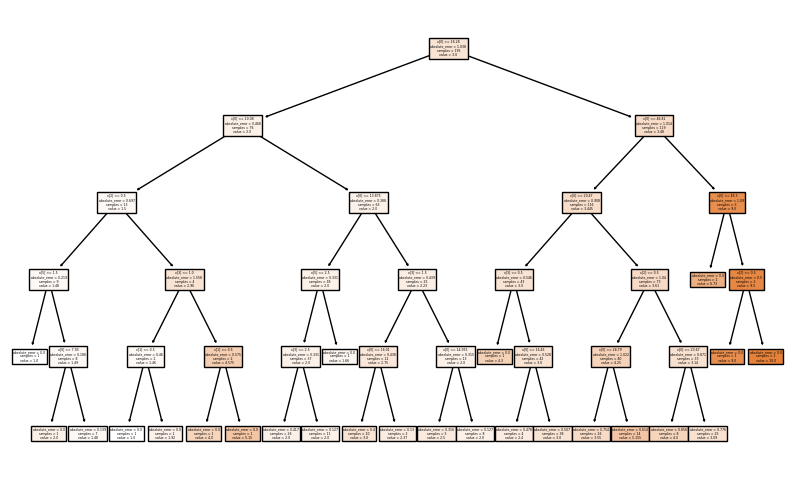

In [111]:
# Plot the Decision Tree Regressor
fig = plt.figure(figsize=(10, 6))
_ = tree.plot_tree(Regressor_model, filled=True)

plt.show()

## **Methode-2** Save the model in .dot file and preview the graph through extension

In [112]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(Regressor_model, out_file='Decision_tree_Regressor.dot', feature_names=X.columns, filled=True, rounded=True)